In [1]:
import re
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
with open('../data/raw_data.txt', 'r', encoding='utf-8') as file:
    raw_stats = file.read()

In [4]:
stats_by_year_list = re.split(r'ГОД', raw_stats)[1:]

In [5]:
year_stats_dict = {}
for i in range(0, len(stats_by_year_list)):
    year = stats_by_year_list[i][:5].strip()
    stats = stats_by_year_list[i][5:].strip()
    year_stats_dict[year] = stats

In [6]:
results = []
for year, data in year_stats_dict.items():
    lines = data.strip().split('\n')
    current_date = None
    current_lines = []

    for line in lines:
        date_match = re.search(r'Число подписчиков на (\d+ \w+)(?:\s|$|)', line)
        if date_match:
            if current_date and current_lines:
                results.append((f"{current_date} {year}", current_lines))
            current_date = date_match.group(1)
            current_lines = []
        elif line.strip():
            current_lines.append(line)

    if current_date and current_lines:
        results.append((f"{current_date} {year}", current_lines))

In [7]:
month_map = {
        'января': 1, 'февраля': 2, 'марта': 3, 'апреля': 4,
        'мая': 5, 'июня': 6, 'июля': 7, 'августа': 8,
        'сентября': 9, 'октября': 10, 'ноября': 11, 'декабря': 12
    }

In [8]:
stats_with_datetime = []
for date_str, lines in results:
        day, month, year = date_str.split()
        month_num = month_map[month]
        date = datetime(int(year), month_num, int(day))
        stats_with_datetime.append((date, lines))

In [9]:
def clean_data_lines(channel_stats):
    processed_lines = []
    for channel_stat in channel_stats:
        chan, num_subscribers = channel_stat.split('—', 1)
        chan = chan.strip()

        # removing numbers in parentheses
        num_subscribers = re.sub(r'\s*\([^)]*\)', '', num_subscribers)
        num_subscribers = num_subscribers.strip()

        # normalising numbers - converting to thousands
        num_subscribers = num_subscribers.replace(' ', '')
        if 'кк' in num_subscribers:
            num = float(num_subscribers.replace('кк', '').replace(',', '.')) * 1000
        else:
            num = float(num_subscribers.replace('к', '').replace(',', '.'))

        processed_lines.append((chan, num))

    return processed_lines

In [12]:
pre_df_stats = [(date, clean_data_lines(lines)) for date, lines in stats_with_datetime]

In [16]:
rows = []
for date, channel_data in pre_df_stats:
    row = {'date': date}
    for channel, subscribers in channel_data:
        row[channel] = subscribers
    rows.append(row)

df = pd.DataFrame(rows)
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

In [26]:
df.to_excel("../data/followers_timeseries.xlsx")

In [18]:
df

,Варламов Talks,Сергей Гуриев,Живой гвоздь (эхо),Майкл Наки,Екатерина Шульман,Популярная политика,Максим Кац,Михаил Ходорковский,Илья Яшин,Котрикадзе Дзядко,...,Екатерина Дунцова,Борис Надеждин,Дарья Беседина,Продолжение следует,Александр Штефанов,The Breakfast Show,CIT,И Грянул Грэм,ГражданинЪ TV,Yulia Latynina
date,,,,,,,,,,,,,,,,,,,,,
2022-03-22,104.0,308.0,351.0,514.0,842.0,906.0,1080.0,1100.0,1110.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-24,115.0,311.0,377.0,530.0,851.0,962.0,1100.0,1110.0,1130.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-25,117.0,312.0,385.0,535.0,853.0,987.0,1110.0,1120.0,1140.0,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-26,136.0,313.0,396.0,540.0,854.0,1000.0,1110.0,1120.0,1140.0,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-30,176.0,314.0,414.0,550.0,859.0,1040.0,1140.0,1120.0,1150.0,133.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-14,NaN,330.0,NaN,1880.0,1220.0,2690.0,2330.0,1280.0,1690.0,185.0,...,77.0,110.0,55.0,1.08,400.0,671.0,78.0,990.0,NaN,NaN
2024-10-02,NaN,330.0,NaN,1910.0,1220.0,2710.0,2350.0,1280.0,1690.0,186.0,...,77.0,110.0,55.0,1.09,405.0,690.0,80.0,1010.0,NaN,NaN
2024-10-29,NaN,329.0,NaN,1930.0,1220.0,2740.0,2370.0,1300.0,1690.0,186.0,...,76.0,109.0,54.0,1.11,415.0,705.0,82.0,1030.0,NaN,NaN


<Axes: >

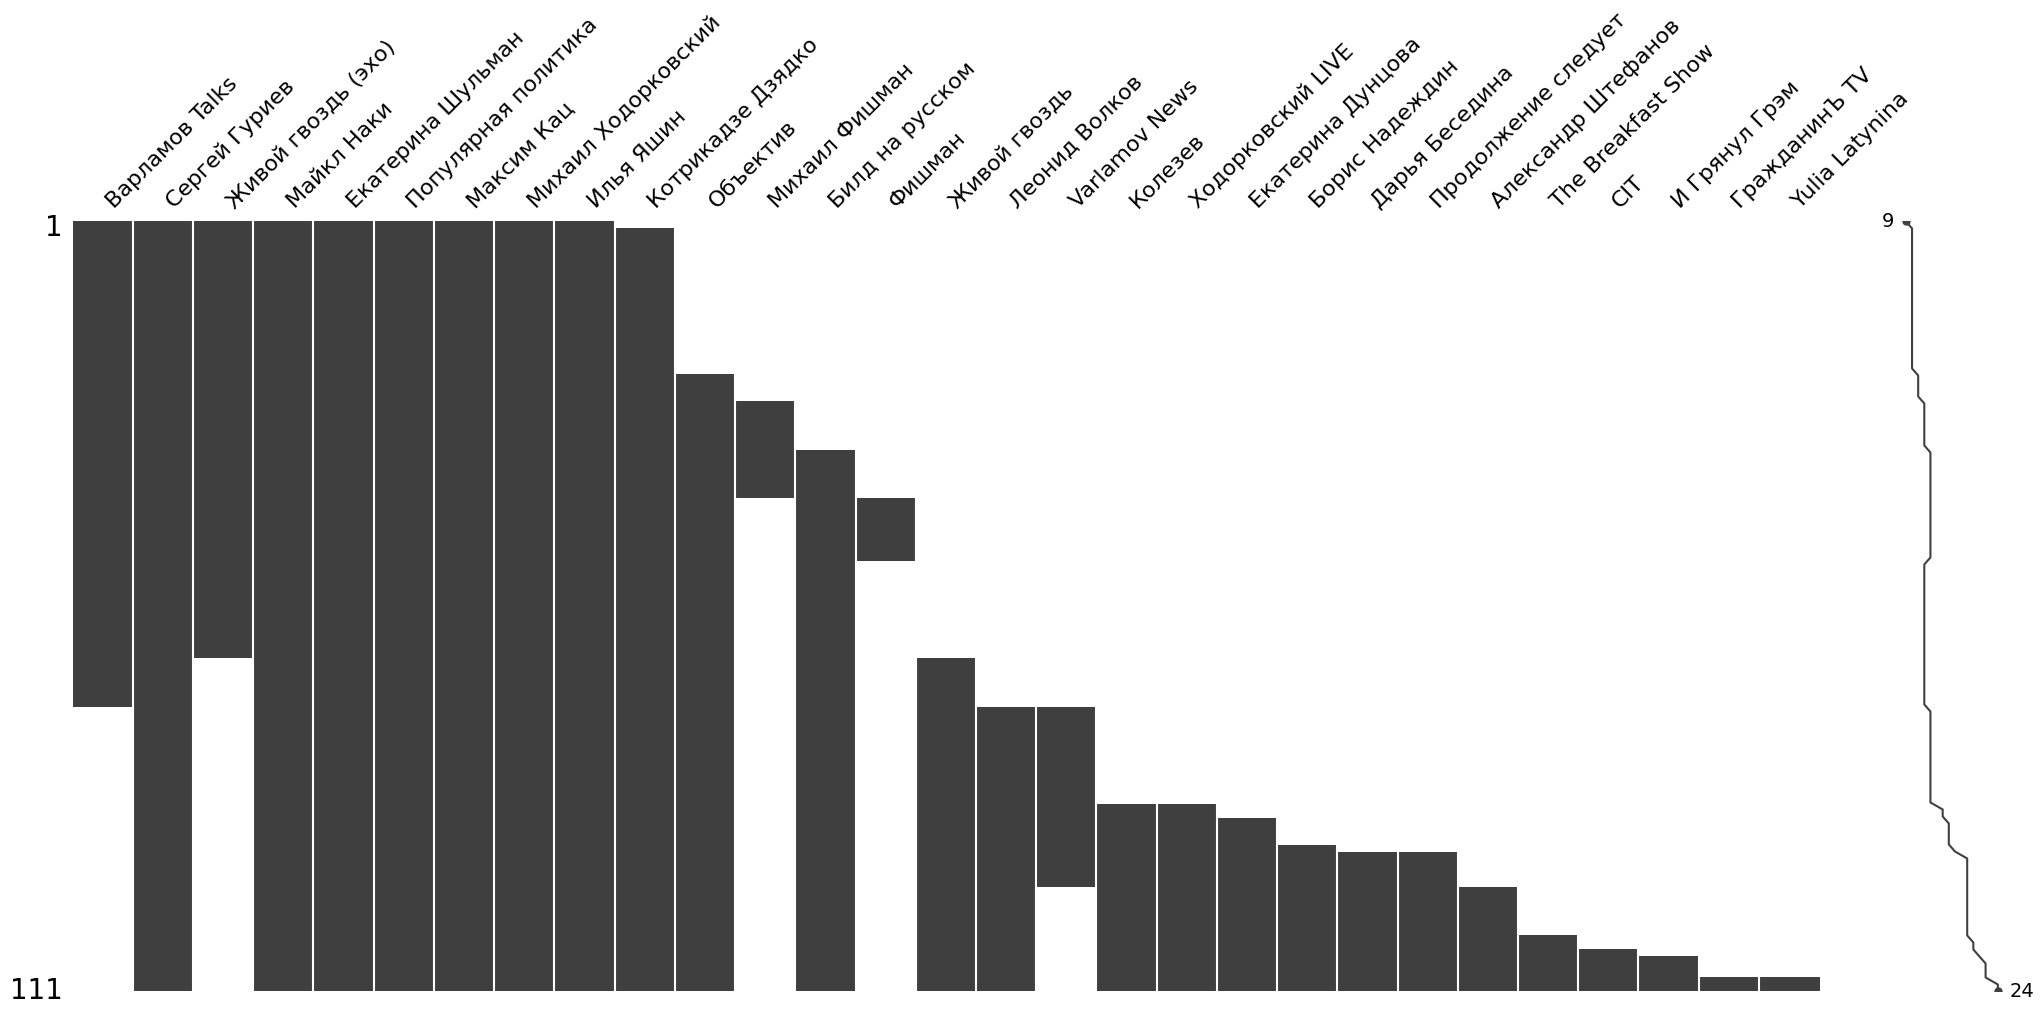

In [19]:
msno.matrix(df)

<Axes: xlabel='date'>

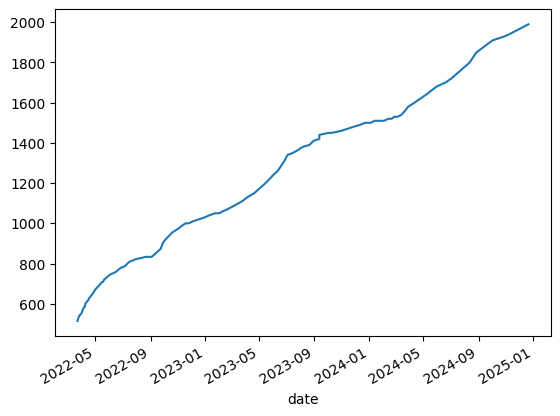

In [20]:
df['Майкл Наки'].plot()

In [21]:
df.columns

Index(['Варламов Talks', 'Сергей Гуриев', 'Живой гвоздь (эхо)', 'Майкл Наки',
       'Екатерина Шульман', 'Популярная политика', 'Максим Кац',
       'Михаил Ходорковский', 'Илья Яшин', 'Котрикадзе Дзядко', 'Объектив',
       'Михаил Фишман', 'Билд на русском', 'Фишман', 'Живой гвоздь',
       'Леонид Волков', 'Varlamov News', 'Колезев', 'Ходорковский LIVE',
       'Екатерина Дунцова', 'Борис Надеждин', 'Дарья Беседина',
       'Продолжение следует', 'Александр Штефанов', 'The Breakfast Show',
       'CIT', 'И Грянул Грэм', 'ГражданинЪ TV', 'Yulia Latynina'],
      dtype='object')

In [22]:
df_changes = df.diff().iloc[1:]

In [23]:
df_changes

,Варламов Talks,Сергей Гуриев,Живой гвоздь (эхо),Майкл Наки,Екатерина Шульман,Популярная политика,Максим Кац,Михаил Ходорковский,Илья Яшин,Котрикадзе Дзядко,...,Екатерина Дунцова,Борис Надеждин,Дарья Беседина,Продолжение следует,Александр Штефанов,The Breakfast Show,CIT,И Грянул Грэм,ГражданинЪ TV,Yulia Latynina
date,,,,,,,,,,,,,,,,,,,,,
2022-03-24,11.0,3.0,26.0,16.0,9.0,56.0,20.0,10.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-25,2.0,1.0,8.0,5.0,2.0,25.0,10.0,10.0,10.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-26,19.0,1.0,11.0,5.0,1.0,13.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-30,40.0,1.0,18.0,10.0,5.0,40.0,30.0,0.0,10.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-31,58.0,1.0,12.0,4.0,12.0,10.0,10.0,10.0,0.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-14,NaN,-1.0,NaN,30.0,0.0,30.0,10.0,10.0,10.0,0.0,...,-1.0,-1.0,0.0,0.01,4.0,16.0,17.0,NaN,NaN,NaN
2024-10-02,NaN,0.0,NaN,30.0,0.0,20.0,20.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.01,5.0,19.0,2.0,20.0,NaN,NaN
2024-10-29,NaN,-1.0,NaN,20.0,0.0,30.0,20.0,20.0,0.0,0.0,...,-1.0,-1.0,-1.0,0.02,10.0,15.0,2.0,20.0,NaN,NaN


<Axes: xlabel='date'>

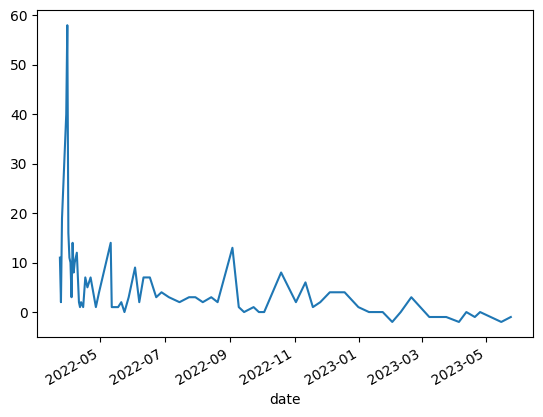

In [24]:
df_changes['Варламов Talks'].plot()

In [30]:
df_changes.to_excel("../data/followers_changes_timeseries.xlsx")